In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input

/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [2]:
# import dataset and shuffle data
df = pd.read_csv('dataset_2.csv')
df = df.sample(frac=1).reset_index(drop=True)
df


,Head X,Head Y,Head Pressure,Hip Bone X,Hip Bone Y,Hip Bone Pressure,Legs X,Legs Y,Legs Pressure,Subject,Position
0,9.360000,18.980000,135.143713,12.069264,31.493506,138.112521,10.934783,51.304348,58.602207,2,0
1,9.168421,16.463158,27.173072,20.071429,28.857143,256.809237,4.200000,47.844444,75.016208,3,0
2,10.660377,15.037736,50.466241,7.972678,30.065574,90.983007,8.300000,51.200000,184.532687,1,0
3,10.000000,9.500000,77.931761,13.453333,25.080000,134.242098,9.921348,44.842697,76.362058,9,1
4,7.347368,16.705263,60.534741,11.226190,27.595238,71.301520,25.333333,52.666667,426.716471,6,0
...,...,...,...,...,...,...,...,...,...,...,...
1562,9.651163,17.744186,36.990445,18.813953,30.441860,159.031166,4.500000,49.892857,169.245746,2,0
1563,6.500000,16.000000,65.449085,13.821053,27.473684,198.759707,7.782609,50.217391,202.646115,6,0
1564,10.500000,12.333333,297.096250,10.930070,24.384615,63.500126,12.145418,45.930279,5.755175,1,2
1565,6.500000,16.000000,84.552475,11.859504,28.033058,218.447230,10.438356,51.671233,186.701956,6,0


In [3]:
# Split dataset in train, val and test
num_col = len(df.columns)
#train_split = 900
#test_split = 1050
train_split = 1300
test_split = 1500

train_data = df.iloc[0:train_split, 0:num_col-2]
val_data = df.iloc[train_split:test_split, 0:num_col-2]

train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
train_position = df.iloc[0:train_split, num_col-1:num_col]
val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
val_position = df.iloc[train_split:test_split, num_col-1:num_col]

test_data = df.iloc[test_split:,:num_col-2]
test_subject = df.iloc[test_split:, num_col-2:num_col-1]
test_position = df.iloc[test_split:, num_col-1:num_col]

test_data = np.array(test_data)
test_subject = np.array(test_subject)
test_position = np.array(test_position)
#test_data = test_data.reshape(len(test_data), 64,32, 1)
#test_data = test_data / 500
test_subject = to_categorical(test_subject)
test_position = to_categorical(test_position)

print(test_subject.shape[1])

while test_subject.shape[1] != 13:
    df = df.sample(frac=1).reset_index(drop=True)
    train_data = df.iloc[0:train_split, 0:num_col-2]
    val_data = df.iloc[train_split:test_split, 0:num_col-2]

    train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
    train_position = df.iloc[0:train_split, num_col-1:num_col]
    val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
    val_position = df.iloc[train_split:test_split, num_col-1:num_col]

    test_data = df.iloc[test_split:,:num_col-2]
    test_subject = df.iloc[test_split:, num_col-2:num_col-1]
    test_position = df.iloc[test_split:, num_col-1:num_col]

    test_data = np.array(test_data)
    test_subject = np.array(test_subject)
    test_position = np.array(test_position)
    #test_data = test_data.reshape(len(test_data), 64,32, 1)
    #test_data = test_data / 500
    test_subject = to_categorical(test_subject)
    test_position = to_categorical(test_position)
    
    print(test_subject.shape[1])


13


In [4]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_subject = np.array(train_subject)
train_position = np.array(train_position)
val_subject = np.array(val_subject)
val_position = np.array(val_position)

#train_data = train_data.reshape(len(train_data), 64,32, 1)
#val_data = val_data.reshape(len(val_data), 64,32, 1)

print(train_data.shape)
print(train_subject.shape)
print(train_position.shape)
print(val_data.shape)
print(val_subject.shape)
print(val_position.shape)


(1300, 9)
(1300, 1)
(1300, 1)
(200, 9)
(200, 1)
(200, 1)


[  9.16842105  16.46315789  27.17307245  20.07142857  28.85714286
 256.8092368    4.2         47.84444444  75.01620849]
[ 10.66037736  15.03773585  50.46624085   7.9726776   30.06557377
  90.98300698   8.3         51.2        184.53268671]
[ 10.           9.5         77.93176138  13.45333333  25.08
 134.24209838   9.92134831  44.84269663  76.36205792]
[  7.34736842  16.70526316  60.53474134  11.22619048  27.5952381
  71.30151954  25.33333333  52.66666667 426.71647101]
[  8.32142857  16.67857143 199.95777027  10.27112676  28.3415493
 172.62442901   9.45977011  56.71264368 180.49083566]


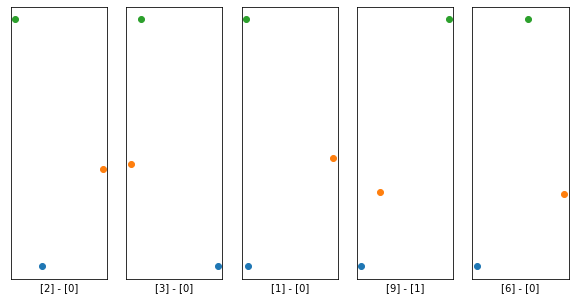

In [5]:
plt.figure(figsize=(10,5))
i = 0

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(train_subject[i-1]) + ' - ' + str(train_position[i-1])
    plt.plot(train_data[i][0],train_data[i][1], 'o')
    plt.plot(train_data[i][3],train_data[i][4], 'o')
    plt.plot(train_data[i][6],train_data[i][7], 'o')
    plt.xlabel(label)
    print(train_data[i])

In [6]:
# normalize data and build categorical labels

train_subject = to_categorical(train_subject, 13)
train_position = to_categorical(train_position, 3)
val_subject = to_categorical(val_subject, 13)
val_position = to_categorical(val_position, 3)


In [7]:
inp = 9

model_position = Sequential()
model_position.add(Dense(64, input_dim= inp, activation='relu'))
model_position.add(Dropout(0.4))
model_position.add(Dense(32, activation='relu'))
model_position.add(Dense(32, activation='relu'))
model_position.add(Dense(16, activation='relu'))
model_position.add(Dense(9, activation='relu'))

model_position.add(Dense(3, activation='softmax'))

model_subject = Sequential()
model_subject.add(Dense(64, input_dim= inp, activation='relu'))
model_subject.add(Dropout(0.4))
model_subject.add(Dense(32, activation='relu'))
model_subject.add(Dense(32, activation='relu'))
model_subject.add(Dense(16, activation='relu'))
model_subject.add(Dense(9, activation='relu'))

model_subject.add(Dense(13, activation='softmax'))

'''s = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
s = MaxPooling2D((2, 2))(s)
s = Dropout(0.4)(s)

s = Flatten()(s)
s = Dense(120, activation='relu')(s)
s = Dense(84, activation='relu')(s)

s = Dropout(0.4)(s)

subject = Dense(13, activation='softmax')(s)

model_subject = Model(inp, subject)
model_position = Model(inp, position)'''

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


"s = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)\ns = MaxPooling2D((2, 2))(s)\ns = Dropout(0.4)(s)\n\ns = Flatten()(s)\ns = Dense(120, activation='relu')(s)\ns = Dense(84, activation='relu')(s)\n\ns = Dropout(0.4)(s)\n\nsubject = Dense(13, activation='softmax')(s)\n\nmodel_subject = Model(inp, subject)\nmodel_position = Model(inp, position)"

In [8]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model_position.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
model_subject.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
'''model_position.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

model_subject.summary()
model_position.summary()'''

model_position.summary()
model_subject.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 153       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 3

In [9]:
#train subject model
history = History()

train_position = model_position.fit(train_data, train_position, validation_data = (val_data, val_position), epochs=250,  callbacks = [history])


Train on 1300 samples, validate on 200 samples
Epoch 1/250
1300/1300 [==============================] - 0s 250us/sample - loss: 7.1649 - acc: 0.4231 - val_loss: 1.5117 - val_acc: 0.2950
Epoch 2/250
1300/1300 [==============================] - 0s 72us/sample - loss: 2.0526 - acc: 0.4531 - val_loss: 1.2946 - val_acc: 0.2850
Epoch 3/250
1300/1300 [==============================] - 0s 76us/sample - loss: 1.6378 - acc: 0.4846 - val_loss: 1.1739 - val_acc: 0.3100
Epoch 4/250
1300/1300 [==============================] - 0s 79us/sample - loss: 1.5456 - acc: 0.4438 - val_loss: 1.1511 - val_acc: 0.2850
Epoch 5/250
1300/1300 [==============================] - 0s 73us/sample - loss: 1.2873 - acc: 0.4862 - val_loss: 1.1256 - val_acc: 0.2700
Epoch 6/250
1300/1300 [==============================] - 0s 56us/sample - loss: 1.1714 - acc: 0.4823 - val_loss: 1.0983 - val_acc: 0.4350
Epoch 7/250
1300/1300 [==============================] - 0s 57us/sample - loss: 1.1696 - acc: 0.5031 - val_loss: 1.0539 - va

1300/1300 [==============================] - 0s 57us/sample - loss: 0.8493 - acc: 0.6346 - val_loss: 0.8911 - val_acc: 0.6050
Epoch 60/250
1300/1300 [==============================] - 0s 70us/sample - loss: 0.8564 - acc: 0.6308 - val_loss: 0.8982 - val_acc: 0.5850
Epoch 61/250
1300/1300 [==============================] - 0s 73us/sample - loss: 0.8376 - acc: 0.6485 - val_loss: 0.8738 - val_acc: 0.6150
Epoch 62/250
1300/1300 [==============================] - 0s 70us/sample - loss: 0.8479 - acc: 0.6231 - val_loss: 0.8767 - val_acc: 0.6050
Epoch 63/250
1300/1300 [==============================] - 0s 58us/sample - loss: 0.8421 - acc: 0.6454 - val_loss: 0.8825 - val_acc: 0.5900
Epoch 64/250
1300/1300 [==============================] - 0s 51us/sample - loss: 0.8207 - acc: 0.6646 - val_loss: 0.8613 - val_acc: 0.6100
Epoch 65/250
1300/1300 [==============================] - 0s 55us/sample - loss: 0.8517 - acc: 0.6462 - val_loss: 0.9137 - val_acc: 0.5750
Epoch 66/250
1300/1300 [================

Epoch 118/250
1300/1300 [==============================] - 0s 59us/sample - loss: 0.6357 - acc: 0.7423 - val_loss: 0.6435 - val_acc: 0.7250
Epoch 119/250
1300/1300 [==============================] - 0s 65us/sample - loss: 0.6491 - acc: 0.7292 - val_loss: 0.6563 - val_acc: 0.7050
Epoch 120/250
1300/1300 [==============================] - 0s 74us/sample - loss: 0.6273 - acc: 0.7423 - val_loss: 0.6372 - val_acc: 0.7200
Epoch 121/250
1300/1300 [==============================] - 0s 76us/sample - loss: 0.6348 - acc: 0.7492 - val_loss: 0.7043 - val_acc: 0.6950
Epoch 122/250
1300/1300 [==============================] - 0s 73us/sample - loss: 0.6224 - acc: 0.7523 - val_loss: 0.6295 - val_acc: 0.7450
Epoch 123/250
1300/1300 [==============================] - 0s 66us/sample - loss: 0.6260 - acc: 0.7562 - val_loss: 0.5839 - val_acc: 0.7850
Epoch 124/250
1300/1300 [==============================] - 0s 60us/sample - loss: 0.6180 - acc: 0.7585 - val_loss: 0.6626 - val_acc: 0.7150
Epoch 125/250
1300/1

1300/1300 [==============================] - 0s 58us/sample - loss: 0.4659 - acc: 0.8077 - val_loss: 0.4805 - val_acc: 0.7900
Epoch 177/250
1300/1300 [==============================] - 0s 58us/sample - loss: 0.4636 - acc: 0.8100 - val_loss: 0.4851 - val_acc: 0.8050
Epoch 178/250
1300/1300 [==============================] - 0s 55us/sample - loss: 0.4538 - acc: 0.8054 - val_loss: 0.4530 - val_acc: 0.8000
Epoch 179/250
1300/1300 [==============================] - 0s 55us/sample - loss: 0.4606 - acc: 0.8146 - val_loss: 0.4732 - val_acc: 0.8000
Epoch 180/250
1300/1300 [==============================] - 0s 56us/sample - loss: 0.4449 - acc: 0.8108 - val_loss: 0.4721 - val_acc: 0.7850
Epoch 181/250
1300/1300 [==============================] - 0s 51us/sample - loss: 0.4785 - acc: 0.7977 - val_loss: 0.4533 - val_acc: 0.8050
Epoch 182/250
1300/1300 [==============================] - 0s 56us/sample - loss: 0.4506 - acc: 0.8177 - val_loss: 0.4906 - val_acc: 0.7500
Epoch 183/250
1300/1300 [=========

1300/1300 [==============================] - 0s 76us/sample - loss: 0.3772 - acc: 0.8438 - val_loss: 0.3738 - val_acc: 0.8250
Epoch 235/250
1300/1300 [==============================] - 0s 70us/sample - loss: 0.3995 - acc: 0.8485 - val_loss: 0.3817 - val_acc: 0.8300
Epoch 236/250
1300/1300 [==============================] - 0s 56us/sample - loss: 0.3821 - acc: 0.8423 - val_loss: 0.4097 - val_acc: 0.8100
Epoch 237/250
1300/1300 [==============================] - 0s 54us/sample - loss: 0.3932 - acc: 0.8469 - val_loss: 0.4404 - val_acc: 0.7950
Epoch 238/250
1300/1300 [==============================] - 0s 52us/sample - loss: 0.3849 - acc: 0.8515 - val_loss: 0.3986 - val_acc: 0.8300
Epoch 239/250
1300/1300 [==============================] - 0s 51us/sample - loss: 0.3783 - acc: 0.8485 - val_loss: 0.5000 - val_acc: 0.8050
Epoch 240/250
1300/1300 [==============================] - 0s 53us/sample - loss: 0.3869 - acc: 0.8515 - val_loss: 0.4310 - val_acc: 0.7900
Epoch 241/250
1300/1300 [=========

67/67 [==============================] - 0s 54us/sample - loss: 0.3265 - acc: 0.8657
[2 0 1 0 1 1 0 2 1 1 2 0 2 1 0 2 2 0 0 1 0 1 0 0 2 0 0 1 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 1 1 0 1 0 0 1 0 2 1 1 0 0 0 0 0 0 1 0 0 2 0 2]


,Subject,Position
1500,5,2
1501,8,0
1502,9,1
1503,4,0
1504,11,1
1505,2,1
1506,4,0
1507,4,2
1508,4,1
1509,3,1


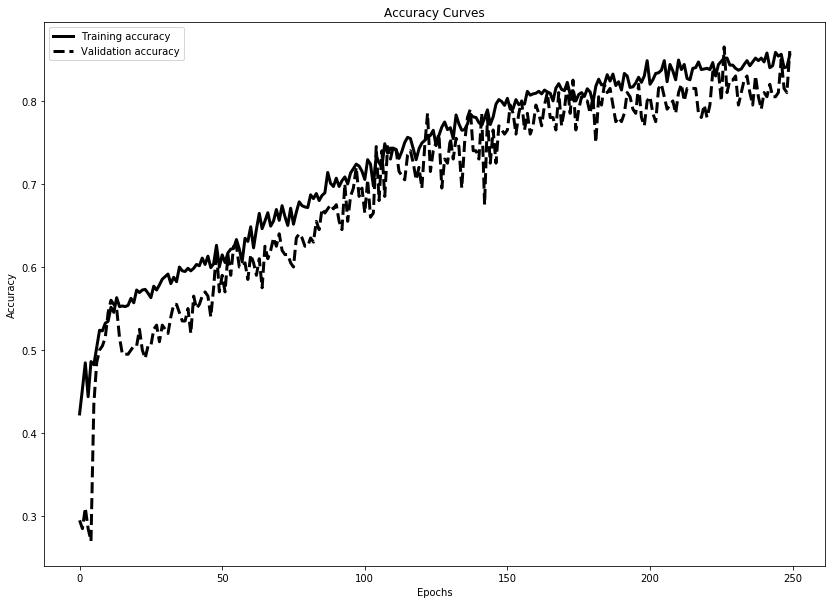

In [11]:
plt.figure(figsize = (14,10))
plt.plot(history.history['acc'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_acc'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


model_position.evaluate(test_data, test_position)

predictions_position = model_position.predict(test_data)
predictions_position = predictions_position.argmax(axis=-1)

print(predictions_position)
test_labels = df.iloc[test_split:, num_col-2:num_col]
test_labels.head(10)

In [12]:
#train position model
history = History()

train_subject = model_subject.fit(train_data, train_subject, validation_data = (val_data, val_subject), epochs=500, batch_size = 8, callbacks = [history])


Train on 1300 samples, validate on 200 samples
Epoch 1/500
1300/1300 [==============================] - 0s 333us/sample - loss: 3.4720 - acc: 0.0792 - val_loss: 2.5451 - val_acc: 0.1100
Epoch 2/500
1300/1300 [==============================] - 0s 195us/sample - loss: 2.5471 - acc: 0.0808 - val_loss: 2.5366 - val_acc: 0.1100
Epoch 3/500
1300/1300 [==============================] - 0s 209us/sample - loss: 2.5557 - acc: 0.0923 - val_loss: 2.5334 - val_acc: 0.0750
Epoch 4/500
1300/1300 [==============================] - 0s 201us/sample - loss: 2.5463 - acc: 0.0931 - val_loss: 2.5309 - val_acc: 0.0750
Epoch 5/500
1300/1300 [==============================] - 0s 206us/sample - loss: 2.5455 - acc: 0.0900 - val_loss: 2.5292 - val_acc: 0.0750
Epoch 6/500
1300/1300 [==============================] - 0s 205us/sample - loss: 2.5429 - acc: 0.0862 - val_loss: 2.5277 - val_acc: 0.0750
Epoch 7/500
1300/1300 [==============================] - 0s 208us/sample - loss: 2.5449 - acc: 0.0931 - val_loss: 2.527

1300/1300 [==============================] - 0s 194us/sample - loss: 2.5407 - acc: 0.0900 - val_loss: 2.5225 - val_acc: 0.0700
Epoch 60/500
1300/1300 [==============================] - 0s 200us/sample - loss: 2.5407 - acc: 0.0892 - val_loss: 2.5227 - val_acc: 0.0700
Epoch 61/500
1300/1300 [==============================] - 0s 195us/sample - loss: 2.5409 - acc: 0.0946 - val_loss: 2.5226 - val_acc: 0.0700
Epoch 62/500
1300/1300 [==============================] - 0s 188us/sample - loss: 2.5407 - acc: 0.0946 - val_loss: 2.5227 - val_acc: 0.0700
Epoch 63/500
1300/1300 [==============================] - 0s 189us/sample - loss: 2.5406 - acc: 0.0892 - val_loss: 2.5225 - val_acc: 0.0700
Epoch 64/500
1300/1300 [==============================] - 0s 187us/sample - loss: 2.5412 - acc: 0.0862 - val_loss: 2.5223 - val_acc: 0.0700
Epoch 65/500
1300/1300 [==============================] - 0s 191us/sample - loss: 2.5407 - acc: 0.0892 - val_loss: 2.5225 - val_acc: 0.0700
Epoch 66/500
1300/1300 [=========

1300/1300 [==============================] - 0s 200us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 118/500
1300/1300 [==============================] - 0s 186us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 119/500
1300/1300 [==============================] - 0s 188us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5229 - val_acc: 0.0700
Epoch 120/500
1300/1300 [==============================] - 0s 190us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 121/500
1300/1300 [==============================] - 0s 204us/sample - loss: 2.5407 - acc: 0.0946 - val_loss: 2.5222 - val_acc: 0.0700
Epoch 122/500
1300/1300 [==============================] - 0s 188us/sample - loss: 2.5407 - acc: 0.0946 - val_loss: 2.5227 - val_acc: 0.0700
Epoch 123/500
1300/1300 [==============================] - 0s 186us/sample - loss: 2.5406 - acc: 0.0892 - val_loss: 2.5226 - val_acc: 0.0700
Epoch 124/500
1300/1300 [==

1300/1300 [==============================] - 0s 183us/sample - loss: 2.5406 - acc: 0.0931 - val_loss: 2.5226 - val_acc: 0.0700
Epoch 176/500
1300/1300 [==============================] - 0s 184us/sample - loss: 2.5407 - acc: 0.0946 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 177/500
1300/1300 [==============================] - 0s 185us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 178/500
1300/1300 [==============================] - 0s 184us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5230 - val_acc: 0.0700
Epoch 179/500
1300/1300 [==============================] - 0s 188us/sample - loss: 2.5407 - acc: 0.0846 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 180/500
1300/1300 [==============================] - 0s 187us/sample - loss: 2.5407 - acc: 0.0892 - val_loss: 2.5224 - val_acc: 0.0700
Epoch 181/500
1300/1300 [==============================] - 0s 188us/sample - loss: 2.5405 - acc: 0.0946 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 182/500
1300/1300 [==

1300/1300 [==============================] - 0s 184us/sample - loss: 2.5407 - acc: 0.0838 - val_loss: 2.5231 - val_acc: 0.0700
Epoch 234/500
1300/1300 [==============================] - 0s 180us/sample - loss: 2.5406 - acc: 0.0923 - val_loss: 2.5231 - val_acc: 0.0700
Epoch 235/500
1300/1300 [==============================] - 0s 179us/sample - loss: 2.5405 - acc: 0.0900 - val_loss: 2.5227 - val_acc: 0.0700
Epoch 236/500
1300/1300 [==============================] - 0s 180us/sample - loss: 2.5405 - acc: 0.0808 - val_loss: 2.5227 - val_acc: 0.0700
Epoch 237/500
1300/1300 [==============================] - 0s 182us/sample - loss: 2.5405 - acc: 0.0946 - val_loss: 2.5232 - val_acc: 0.0700
Epoch 238/500
1300/1300 [==============================] - 0s 182us/sample - loss: 2.5405 - acc: 0.0946 - val_loss: 2.5232 - val_acc: 0.0700
Epoch 239/500
1300/1300 [==============================] - 0s 182us/sample - loss: 2.5406 - acc: 0.0915 - val_loss: 2.5227 - val_acc: 0.0700
Epoch 240/500
1300/1300 [==

1300/1300 [==============================] - 0s 180us/sample - loss: 2.5406 - acc: 0.0885 - val_loss: 2.5225 - val_acc: 0.0700
Epoch 292/500
1300/1300 [==============================] - 0s 180us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5226 - val_acc: 0.0700
Epoch 293/500
1300/1300 [==============================] - 0s 182us/sample - loss: 2.5406 - acc: 0.0915 - val_loss: 2.5229 - val_acc: 0.0700
Epoch 294/500
1300/1300 [==============================] - 0s 180us/sample - loss: 2.5407 - acc: 0.0869 - val_loss: 2.5230 - val_acc: 0.0700
Epoch 295/500
1300/1300 [==============================] - 0s 180us/sample - loss: 2.5407 - acc: 0.0862 - val_loss: 2.5227 - val_acc: 0.0700
Epoch 296/500
1300/1300 [==============================] - 0s 179us/sample - loss: 2.5407 - acc: 0.0854 - val_loss: 2.5229 - val_acc: 0.0700
Epoch 297/500
1300/1300 [==============================] - 0s 179us/sample - loss: 2.5406 - acc: 0.0908 - val_loss: 2.5226 - val_acc: 0.0700
Epoch 298/500
1300/1300 [==

1300/1300 [==============================] - 0s 186us/sample - loss: 2.5406 - acc: 0.0923 - val_loss: 2.5229 - val_acc: 0.0700
Epoch 350/500
1300/1300 [==============================] - 0s 180us/sample - loss: 2.5406 - acc: 0.0885 - val_loss: 2.5229 - val_acc: 0.0700
Epoch 351/500
1300/1300 [==============================] - 0s 180us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5230 - val_acc: 0.0700
Epoch 352/500
1300/1300 [==============================] - 0s 179us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5229 - val_acc: 0.0700
Epoch 353/500
1300/1300 [==============================] - 0s 181us/sample - loss: 2.5406 - acc: 0.0877 - val_loss: 2.5229 - val_acc: 0.0700
Epoch 354/500
1300/1300 [==============================] - 0s 178us/sample - loss: 2.5407 - acc: 0.0946 - val_loss: 2.5233 - val_acc: 0.0700
Epoch 355/500
1300/1300 [==============================] - 0s 181us/sample - loss: 2.5406 - acc: 0.0877 - val_loss: 2.5230 - val_acc: 0.0700
Epoch 356/500
1300/1300 [==

1300/1300 [==============================] - 0s 185us/sample - loss: 2.5406 - acc: 0.0885 - val_loss: 2.5226 - val_acc: 0.0700
Epoch 408/500
1300/1300 [==============================] - 0s 181us/sample - loss: 2.5407 - acc: 0.0785 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 409/500
1300/1300 [==============================] - 0s 180us/sample - loss: 2.5407 - acc: 0.0915 - val_loss: 2.5225 - val_acc: 0.0700
Epoch 410/500
1300/1300 [==============================] - 0s 181us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5227 - val_acc: 0.0700
Epoch 411/500
1300/1300 [==============================] - 0s 185us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5229 - val_acc: 0.0700
Epoch 412/500
1300/1300 [==============================] - 0s 195us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5231 - val_acc: 0.0700
Epoch 413/500
1300/1300 [==============================] - 0s 198us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 414/500
1300/1300 [==

1300/1300 [==============================] - 0s 192us/sample - loss: 2.5407 - acc: 0.0946 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 466/500
1300/1300 [==============================] - 0s 189us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 467/500
1300/1300 [==============================] - 0s 184us/sample - loss: 2.5406 - acc: 0.0900 - val_loss: 2.5230 - val_acc: 0.0700
Epoch 468/500
1300/1300 [==============================] - 0s 183us/sample - loss: 2.5406 - acc: 0.0915 - val_loss: 2.5229 - val_acc: 0.0700
Epoch 469/500
1300/1300 [==============================] - 0s 187us/sample - loss: 2.5405 - acc: 0.0946 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 470/500
1300/1300 [==============================] - 0s 186us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5227 - val_acc: 0.0700
Epoch 471/500
1300/1300 [==============================] - 0s 184us/sample - loss: 2.5406 - acc: 0.0946 - val_loss: 2.5228 - val_acc: 0.0700
Epoch 472/500
1300/1300 [==

Text(0, 0.5, 'Accuracy')

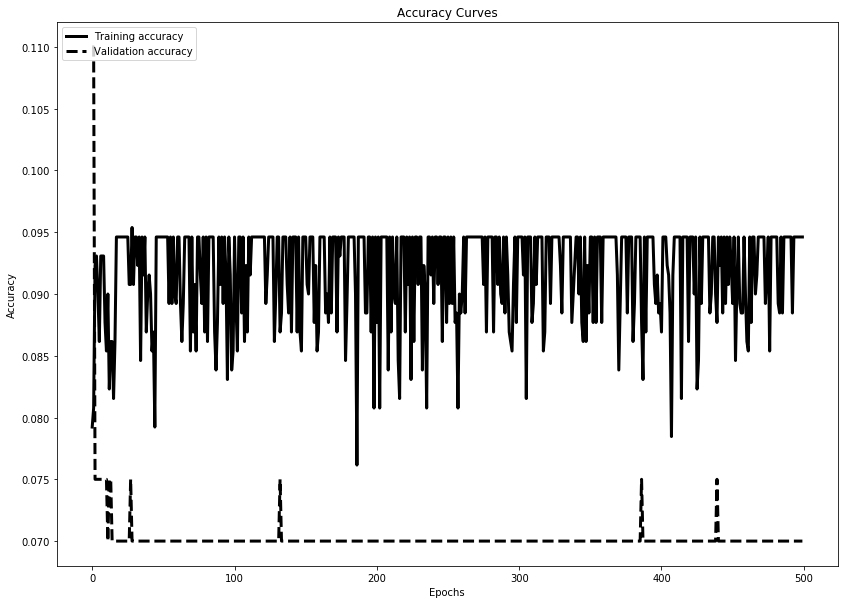

In [13]:
plt.figure(figsize = (14,10))
plt.plot(history.history['acc'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_acc'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [ ]:
model_subject.evaluate(test_data, test_subject)
model_position.evaluate(test_data, test_position)


In [ ]:
predictions_subject = model_subject.predict(test_data)
predictions_position = model_position.predict(test_data)

predictions_subject = predictions_subject.argmax(axis=-1)
predictions_position = predictions_position.argmax(axis=-1)

plt.figure(figsize=(20,10))

for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(predictions_subject[i-1]) + ' - ' + str(predictions_position[i-1])
    plt.imshow(test_data[i-1].reshape(64, 32), cmap='gray')
    plt.xlabel(label)

test_labels = df.iloc[test_split:, num_col-2:num_col]
test_labels.head(10)


In [ ]:
import pickle
#save model and architecture to single file
model_subject.save("model_subject.h5")
model_position.save("model_position.h5")

with open('test.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([test_data, test_subject, test_position], f)